In [2]:
import pandas as pd
import numpy as np

In [38]:
ca=pd.read_csv('Cust_Account',low_memory=False)
pd.set_option('display.max_columns',None)
ca.head()

,Unnamed: 0,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,13500,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN


### Removing features not required for further analysis

In [39]:
##From initial analysis dropping features that do not quallfy for customer behaviour detection
drop_list=['Unnamed: 0','dt_opened','upload_dt','opened_dt','last_paymt_dt','closed_dt','reporting_dt',
         'paymenthistory1','paymenthistory2','paymt_str_dt','paymt_end_dt','rateofinterest','amt_past_due']
ca.drop(drop_list,axis=1,inplace=True)

### Missing value imputation

In [40]:
ca.head()

,customer_no,acct_type,owner_indic,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,paymentfrequency,actualpaymentamount
0,12265,6,1,20900.0,0,NaN,NaN,NaN,NaN,NaN
1,12265,10,1,16201.0,10390,NaN,14000.0,1400.0,3.0,5603.0
2,12265,10,1,41028.0,34420,NaN,NaN,NaN,NaN,NaN
3,15606,10,1,93473.0,0,NaN,NaN,NaN,NaN,NaN
4,15606,6,1,20250.0,13500,NaN,NaN,NaN,NaN,NaN


In [12]:
ca.isnull().sum()

customer_no                 0
acct_type                   0
owner_indic                 0
high_credit_amt          8875
cur_balance_amt             0
amt_past_due           185453
creditlimit            137477
cashlimit              151047
rateofinterest         161496
paymentfrequency       122436
actualpaymentamount    145276
dtype: int64

In [ ]:
## Replacing high_credit_amt null with mean

In [41]:
##ca.high_credit_amt.describe()
mean=np.mean(ca.high_credit_amt)
mean

175610.35165169564

In [42]:
ca.loc[ca['high_credit_amt'].isnull()==True,'high_credit_amt']=mean

In [ ]:
## amt_past_due imputing by mean

In [43]:
## credit limit imputation by mean
mean=np.mean(ca.creditlimit)
ca.loc[ca['creditlimit'].isnull()==True,'creditlimit']=mean

In [44]:
## cashlimit imputation by mean
mean=np.mean(ca.cashlimit)
ca.loc[ca['cashlimit'].isnull()==True,'cashlimit']=mean

In [45]:
## cashlimit imputation by mean
mean=np.mean(ca.cashlimit)
ca.loc[ca['cashlimit'].isnull()==True,'cashlimit']=mean

In [46]:
## paymentfrequency imputation by mean
mean=np.mean(ca.paymentfrequency)
ca.loc[ca['paymentfrequency'].isnull()==True,'paymentfrequency']=mean

In [47]:
## actualpaymentamount imputation by mean
mean=np.mean(ca.actualpaymentamount)
ca.loc[ca['actualpaymentamount'].isnull()==True,'actualpaymentamount']=mean

In [50]:
ca.isnull().sum()

customer_no            0
acct_type              0
owner_indic            0
high_credit_amt        0
cur_balance_amt        0
creditlimit            0
cashlimit              0
paymentfrequency       0
actualpaymentamount    0
dtype: int64

## Feature creation

### No of accounts hold by single customer and ownership of accounts

In [17]:
accounts=pd.read_csv('count_of_acc.csv')
accounts.head()

,customer_no,owner_indic,count
0,1,1,17
1,1,4,1
2,2,1,2
3,3,1,1
4,4,1,10


### Credit utilization

In [49]:
cu=ca[['customer_no','owner_indic','acct_type','high_credit_amt','creditlimit']]

In [51]:
## creating utilization
cu['util_amt']=cu.creditlimit-cu.high_credit_amt


C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
cu['utilization']=cu.loc[cu['util_amt']<0,'utilization']='High'
cu.loc[cu['util_amt']==0,'utilization']='Balanced'
cu.loc[cu['util_amt']>0,'utilization']='Low'

C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubhangi sakarkar\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
cu.head()

,customer_no,owner_indic,acct_type,high_credit_amt,creditlimit,util_amt,utilization
0,12265,1,6,20900.0,75528.806559,54628.806559,Low
1,12265,1,10,16201.0,14000.000000,-2201.000000,High
2,12265,1,10,41028.0,75528.806559,34500.806559,Low
3,15606,1,10,93473.0,75528.806559,-17944.193441,High
4,15606,1,6,20250.0,75528.806559,55278.806559,Low


In [4]:
## overall utilization
##k=cu.groupby(by=['customer_no','owner_indic','acct_type','utilization'])['utilization'].count()
k.to_csv('utilization.csv')

NameError: name 'k' is not defined

## Total overdue balance

In [91]:
##Total overdue balance =cur_balance_amt
ov=ca[['customer_no','acct_type','owner_indic','cur_balance_amt']]

In [93]:
k=ov.groupby(by=['customer_no','acct_type','owner_indic'])['cur_balance_amt'].sum()

In [94]:
k.to_csv('overduebalance.csv')

## Customer Enquiry count

In [19]:
ce=pd.read_csv('Cust_Enquiry')
ce.head()

,Unnamed: 0,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,1,18-Apr-15,1,21-Apr-15,05-Mar-14,5.0,500000.0
2,2,18-Apr-15,1,21-Apr-15,05-Mar-14,0.0,50000.0
3,3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0


In [20]:
ec=ce[['customer_no','enq_purpose']]

In [21]:
ec.groupby(by=['customer_no','enq_purpose'])['enq_purpose'].count()

customer_no  enq_purpose
1            0.0             2
             2.0             1
             5.0             1
             10.0           14
2            0.0            21
                            ..
23896        0.0             4
             1.0             1
             2.0             1
             5.0             2
             10.0            8
Name: enq_purpose, Length: 78952, dtype: int64

In [87]:
k.to_csv('enquiry_counts.csv')

## Adding all new features created

In [18]:
##accounts.head()
utilization=pd.read_csv('utilization.csv')
overdue=pd.read_csv('overduebalance.csv')
enquiry_Count=pd.read_csv('enquiry_counts.csv')

In [ ]:
,,

In [19]:
accounts_details=pd.merge(accounts,utilization)

In [20]:
accounts_details.head()

,customer_no,owner_indic,count,acct_type,utilization,utilization_count
0,1,1,17,2,High,3
1,1,1,17,5,High,1
2,1,1,17,5,Low,2
3,1,1,17,6,Low,3
4,1,1,17,10,High,6


In [21]:
accounts_details_=pd.merge(accounts_details,overdue)

In [22]:
accounts_details_final=pd.merge(accounts_details_,enquiry_Count)

In [23]:
accounts_details_final.to_csv('accounts_final.csv')

In [29]:
accounts_final=pd.read_csv('accounts_final.csv')
##accounts_final.head()

In [28]:
accounts_final.drop('utilization_count',axis=1,inplace=True)

In [ ]:
#3accounts_final=pd.read_csv('accounts_final.csv')
dl=['Unnamed: 0','utilization_count']
accounts_final.drop(dl,axis=1,inplace=True)

## Analysing customer demographics

In [72]:
cd=pd.read_csv('Cust_Demographics',low_memory=False)

In [73]:
cd.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0


## Checking the missing values

In [75]:
len(cd)

23896

In [77]:
cd.isnull().sum()/len(cd)

Unnamed: 0     0.000000
dt_opened      0.000000
customer_no    0.000000
entry_time     0.000628
feature_1      0.000628
feature_2      0.118681
feature_3      0.118681
feature_4      0.000628
feature_5      0.000628
feature_6      0.000628
feature_7      0.000628
feature_8      0.947230
feature_9      0.947230
feature_10     0.997866
feature_11     0.000628
feature_12     0.000628
feature_13     0.544191
feature_14     0.323611
feature_15     0.000963
feature_16     0.001130
feature_17     0.957022
feature_18     0.999247
feature_19     0.000628
feature_20     0.000000
feature_21     0.000628
feature_22     0.000000
feature_23     0.000628
feature_24     0.026783
feature_25     0.000628
feature_26     0.000628
feature_27     0.152201
feature_28     0.000628
feature_29     0.000628
feature_30     0.000628
feature_31     0.000628
feature_32     0.000628
feature_33     0.000628
feature_34     0.000628
feature_35     0.000628
feature_36     0.237780
feature_37     0.237780
feature_38     0

In [88]:
## dropping features which has huge missing values
drop_list=['feature_2','feature_8','feature_9','feature_10','feature_13', 'feature_14','feature_17', 'feature_18',
           'feature_36','feature_37', 'feature_38','feature_45','feature_48', 'feature_49','feature_51',
           'feature_53','feature_57','feature_61','feature_74','feature_73','Unnamed: 0','dt_opened','entry_time',
           'feature_20','feature_21','feature_22','feature_24','feature_28','feature_29','feature_43','feature_44',
           'feature_45','feature_46','feature_47','feature_54','feature_63','feature_70','feature_75','feature_77']

In [89]:
cd.drop(drop_list,axis=1,inplace=True)

In [92]:
cd.head()

,customer_no,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_15,feature_16,feature_19,feature_23,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label
0,1,Insignia,650.0,2.0,Card Setup,14.0,500000.0,Y,IS1,159,4284,1.0,N,1.0,2.0,NaN,1965.0,0.0,Self,Y,2.0,90000.0,0.0,0.0,0.0,0.0,Y,0.0,1.0,21.0,Y,Y,N,Y,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0
1,2,Insignia,760.0,1.0,Card Setup,14.0,1200000.0,Y,IS1,91,B001,1.0,N,1.0,2.0,NaN,1969.0,0.0,Self,Y,2.0,1.0,0.0,0.0,0.0,0.0,N,0.0,1.0,17.0,Y,Y,N,Y,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0
2,3,Insignia,774.0,1.0,Card Setup,14.0,700000.0,Y,IS1,91,B001,2.0,N,1.0,0.0,NaN,1966.0,0.0,Self,Y,2.0,1.0,0.0,0.0,0.0,0.0,N,0.0,3.0,17.0,N,Y,N,Y,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0
3,4,Insignia,770.0,1.0,Card Setup,14.0,500000.0,Y,IS1,157,5107,1.0,N,1.0,3.0,NaN,1988.0,0.0,Self,Y,2.0,100000.0,0.0,0.0,0.0,0.0,Y,0.0,1.0,21.0,Y,Y,N,Y,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0
4,5,Insignia,NaN,3.0,Card Setup,14.0,500000.0,Y,IS1,100,D016,1.0,N,1.0,3.0,NaN,1995.0,0.0,Self,Y,2.0,300000.0,0.0,0.0,0.0,0.0,N,0.0,1.0,13.0,Y,Y,N,Y,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0


In [109]:
## imputing mean for feature_3
mean=np.mean(cd.feature_3)
cd.loc[cd['feature_3'].isnull()==True,'feature_3']=mean

In [110]:
cd.isnull().sum()

customer_no     0
feature_1      15
feature_3       0
feature_4      15
feature_6      15
feature_7      15
feature_11     15
feature_12     15
feature_19     15
feature_23     15
feature_25     15
feature_26     15
feature_31     15
feature_32     15
feature_33     15
feature_34     15
feature_35     15
feature_39     15
feature_40     15
feature_41     15
feature_42     15
feature_50     15
feature_52     15
feature_55     15
feature_56     15
feature_58     15
feature_59     15
feature_60     15
feature_62     15
feature_64     15
feature_65     15
feature_67     15
feature_68     15
feature_69     15
feature_71     15
feature_72     15
feature_76     15
feature_78     15
feature_79     15
Bad_label       0
dtype: int64

In [111]:
cd.dropna(inplace=True)

In [112]:
cd.isnull().sum()

customer_no    0
feature_1      0
feature_3      0
feature_4      0
feature_6      0
feature_7      0
feature_11     0
feature_12     0
feature_19     0
feature_23     0
feature_25     0
feature_26     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_50     0
feature_52     0
feature_55     0
feature_56     0
feature_58     0
feature_59     0
feature_60     0
feature_62     0
feature_64     0
feature_65     0
feature_67     0
feature_68     0
feature_69     0
feature_71     0
feature_72     0
feature_76     0
feature_78     0
feature_79     0
Bad_label      0
dtype: int64

In [113]:
cd.to_csv('cd_clean.csv')

### Categorical data conversion

In [4]:
cd=pd.read_csv('cd_clean.csv')

In [119]:
cd.describe(include=['O'])

,feature_1,feature_11,feature_12,feature_23,feature_32,feature_33,feature_50,feature_58,feature_59,feature_60,feature_62,feature_72,feature_79
count,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881,23881
unique,7,2,16,2,5,2,2,2,2,2,2,2,2
top,Platinum Maxima,Y,PM1,N,Self,Y,Y,N,Y,N,Y,R,N
freq,9056,22611,8853,21528,10833,19478,12565,23425,22611,23563,23876,15617,23876


In [5]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
cd['feature_1']=lc.fit_transform(cd['feature_1'])
cd['feature_11']=lc.fit_transform(cd['feature_11'])
cd['feature_12']=lc.fit_transform(cd['feature_12'])
cd['feature_23']=lc.fit_transform(cd['feature_23'])
cd['feature_32']=lc.fit_transform(cd['feature_32'])
cd['feature_33']=lc.fit_transform(cd['feature_33'])
cd['feature_50']=lc.fit_transform(cd['feature_50'])
cd['feature_58']=lc.fit_transform(cd['feature_58'])
cd['feature_59']=lc.fit_transform(cd['feature_59'])
cd['feature_60']=lc.fit_transform(cd['feature_60'])
cd['feature_62']=lc.fit_transform(cd['feature_62'])
cd['feature_72']=lc.fit_transform(cd['feature_72'])
cd['feature_79']=lc.fit_transform(cd['feature_79'])

In [127]:
cd.shape

(23881, 40)

## Getting the mutual information from each features

In [6]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.model_selection import train_test_split
X=cd.iloc[:,0:39]
y=cd.Bad_label

In [7]:
mi = mutual_info_classif(X, y)
mi

array([1.11891790e-03, 1.12105000e-03, 5.06287259e-03, 4.05012571e-03,
       3.56147454e-03, 3.75856027e-03, 3.44277819e-03, 4.68077181e-03,
       2.84942784e-03, 4.00597252e-03, 2.03303484e-03, 1.94636924e-03,
       1.38233954e-03, 0.00000000e+00, 3.46531587e-04, 2.78713367e-03,
       1.32354055e-03, 0.00000000e+00, 1.10947033e-03, 0.00000000e+00,
       2.19151867e-03, 8.26033218e-04, 3.46588244e-03, 3.19370434e-03,
       3.68969288e-03, 4.19139287e-04, 0.00000000e+00, 4.17648069e-03,
       2.62361619e-05, 4.79490022e-03, 1.68729043e-03, 2.55025201e-03,
       8.53735144e-05, 4.12469090e-03, 0.00000000e+00, 7.04444645e-04,
       1.61216470e-03, 2.50124268e-04, 4.52575026e-03])

In [8]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)

feature_1      0.005063
feature_62     0.004795
feature_11     0.004681
feature_78     0.004526
feature_59     0.004176
feature_68     0.004125
feature_3      0.004050
feature_19     0.004006
feature_6      0.003759
feature_55     0.003690
feature_4      0.003561
feature_50     0.003466
feature_7      0.003443
feature_52     0.003194
feature_12     0.002849
feature_33     0.002787
feature_65     0.002550
feature_41     0.002192
feature_23     0.002033
feature_25     0.001946
feature_64     0.001687
feature_72     0.001612
feature_26     0.001382
feature_34     0.001324
customer_no    0.001121
Unnamed: 0     0.001119
feature_39     0.001109
feature_42     0.000826
feature_71     0.000704
feature_56     0.000419
feature_32     0.000347
feature_76     0.000250
feature_67     0.000085
feature_60     0.000026
feature_31     0.000000
feature_35     0.000000
feature_58     0.000000
feature_69     0.000000
feature_40     0.000000
dtype: float64

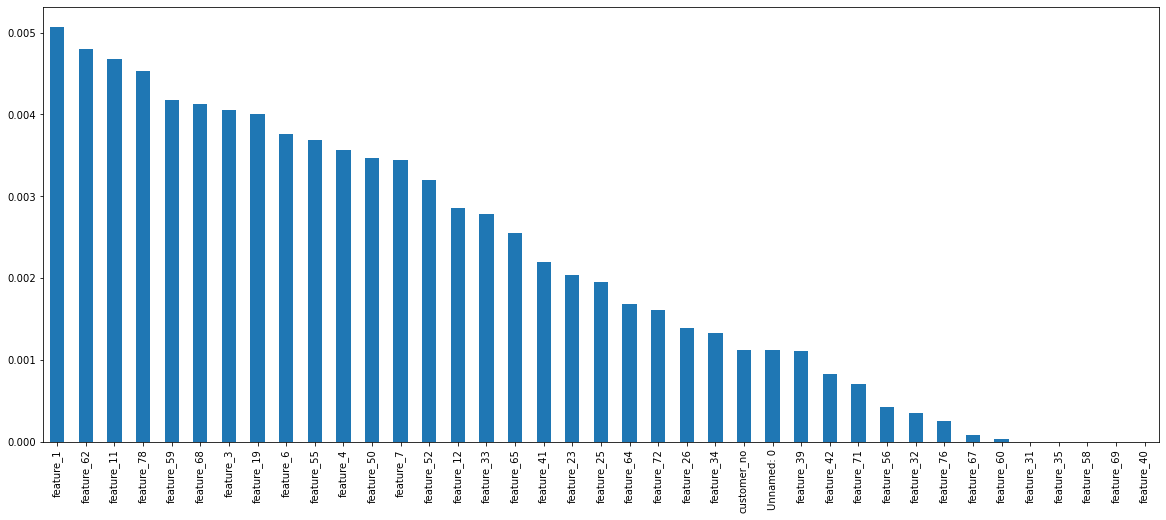

In [9]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [10]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X, y)
X.columns[sel_.get_support()]

Index(['feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_50',
       'feature_55', 'feature_59', 'feature_62', 'feature_68', 'feature_78'],
      dtype='object')

In [11]:
#checking correlation among the selected features
import matplotlib.pyplot as plt
import seaborn as sns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X[['feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_50',
       'feature_55', 'feature_59', 'feature_62', 'feature_68', 'feature_78']], 0.8)
len(set(corr_features))

1

In [13]:
corr_features

{'feature_59'}

## Creating final dataframe 

In [14]:
cd.head()

,Unnamed: 0,customer_no,feature_1,feature_3,feature_4,feature_6,feature_7,feature_11,feature_12,feature_19,...,feature_65,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label
0,0,1,1,650.000000,2.0,14.0,500000.0,1,3,1.0,...,15.0,0.0,2.0,90000.0,21.0,1,0.0,1.0,0,0
1,1,2,1,760.000000,1.0,14.0,1200000.0,1,3,1.0,...,12.0,0.0,2.0,1.0,17.0,1,0.0,1.0,0,0
2,2,3,1,774.000000,1.0,14.0,700000.0,1,3,2.0,...,12.0,0.0,2.0,1.0,17.0,1,0.0,1.0,0,0
3,3,4,1,770.000000,1.0,14.0,500000.0,1,3,1.0,...,16.0,0.0,2.0,100000.0,21.0,1,1.0,1.0,0,0
4,4,5,1,723.235945,3.0,14.0,500000.0,1,3,1.0,...,3.0,0.0,2.0,300000.0,13.0,1,0.0,1.0,0,0


In [15]:
cd=cd[['customer_no','feature_1', 'feature_3', 'feature_4', 'feature_11', 'feature_50',
       'feature_55', 'feature_59', 'feature_62', 'feature_68', 'feature_78','Bad_label']]

In [17]:
accounts_final=pd.read_csv('accounts_final.csv')

In [18]:
final_df=pd.merge(cd,accounts_final)

In [19]:
final_df

,customer_no,feature_1,feature_3,feature_4,feature_11,feature_50,feature_55,feature_59,feature_62,feature_68,feature_78,Bad_label,Unnamed: 0,owner_indic,no_of_accts,acct_type,utilization,utilization_count,cur_balance_amt,enquiry_count
0,1,1,650.0,2.0,1,1,1.0,1,1,2.0,1.0,0,0,1,17,2,High,3,325490,1
1,1,1,650.0,2.0,1,1,1.0,1,1,2.0,1.0,0,1,4,1,2,High,1,1754678,1
2,1,1,650.0,2.0,1,1,1.0,1,1,2.0,1.0,0,2,1,17,5,High,1,0,1
3,1,1,650.0,2.0,1,1,1.0,1,1,2.0,1.0,0,3,1,17,5,Low,2,0,1
4,1,1,650.0,2.0,1,1,1.0,1,1,2.0,1.0,0,4,1,17,10,High,6,2634689,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72926,23895,3,740.0,3.0,1,1,2.0,1,1,2.0,1.0,0,72975,1,5,6,Low,1,0,1
72927,23895,3,740.0,3.0,1,1,2.0,1,1,2.0,1.0,0,72976,1,5,10,Low,3,34618,5
72928,23895,3,740.0,3.0,1,1,2.0,1,1,2.0,1.0,0,72977,4,1,1,High,1,329656,1
72929,23896,6,688.0,1.0,1,1,1.0,1,1,2.0,1.0,0,72978,1,3,10,Low,2,758,8


In [20]:
final_df['utilization']=final_df['utilization'].map({'Low':0,'Balanced':1,'High':2})

In [21]:
final_df.to_csv('final_df.csv')